### 加载数据

In [185]:
#dataList设置第一个分量都为1，这是为了引入偏置，第二个分量为x坐标值，labelList为y坐标值，即对应的真实值
def loadData(filename):
    numFeat = len(open(filename).readline().split('\t'))-1
    dataList = [];labelList = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.split('\t')
        for i in range(numFeat):
            lineArr.extend([float(curLine[i])])
        dataList.append(lineArr)
        labelList.append(float(curLine[-1]))
    return dataList,labelList

### 画出数据点

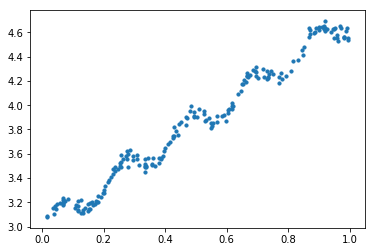

In [190]:
import numpy as np
import matplotlib.pyplot as plt
dataList,labelList = loadData('ex0.txt')
dataArr = np.array(dataList)
labelArr = np.array(labelList)
plt.scatter(dataArr[:,1],labelArr,s=10)

### 用矩阵法求解线性回归

In [3]:
def fastRegress(xArr,yArr):
    xMat = np.mat(xArr);yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0:
        print("This matrix can not inverse ")
        return
    w = xTx.I*(xMat.T*yMat)
    return w
w = fastRegress(dataList,labelList)

### 用梯度下降法求解线性回归

In [4]:
def gradient_Descent(dataList,labelList):
    dataMat = np.mat(dataList);labelMat = np.mat(labelList).T
    n = dataMat.shape[1]
    w = np.mat(np.ones([n,1]))
    for i in range(500):
        error = dataMat * w - labelMat
        w = w - 0.001*dataMat.T*error
    return w
w = gradient_Descent(dataList,labelList)

### 用随机梯度下降求解线性回归

In [5]:
def random_gradient_Descent(dataList,labelList):
    dataMat = np.mat(dataList);labelMat = np.mat(labelList).T
    m,n = dataMat.shape
    w = np.mat(np.ones([n,1]))
    for j in range(100):#迭代次数
        for i in range(m):#每次取一个数据更新权重
            error = dataMat[i] * w - labelMat[i]
            w = w - 0.001*dataMat[i].T*error
    return w
w = random_gradient_Descent(dataList,labelList)

### 画出回归拟合直线

matrix([[3.09034466]])

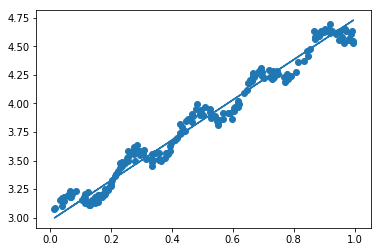

In [204]:
xMat = np.mat(dataList)
yPred = xMat * w #预测值
plt.scatter(dataArr[:,1],labelArr)#真实值
plt.plot(xMat[:,1],yPred)

### 局部加权线性回归

In [193]:
from numpy import *
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye(m))
    for i in range(m):
        diffMat = testPoint - xMat[i,:]
        weights[i,i] = exp(diffMat*diffMat.T/(-2*k**2))#给每个点赋予权重，离测试点越近的点权重越大
    xTx = xMat.T * (weights * xMat)
    w = xTx.I*(xMat.T*(weights*yMat))#矩阵法求解
    return testPoint * w

In [194]:
#用于为数据集中每个点调用lwlr
def lwlrTest(testArr,xArr,yArr,k=1.0):
    m = shape(testArr)[0]
    pred = zeros(m)
    for i in  range(m):
       pred[i] = lwlr(testArr[i],xArr,yArr,k)
    return pred

In [203]:
xArr,yArr = loadData('ex0.txt')
lwlr(xArr[0],xArr,yArr,k=0.05)
yArr[0]

3.176513

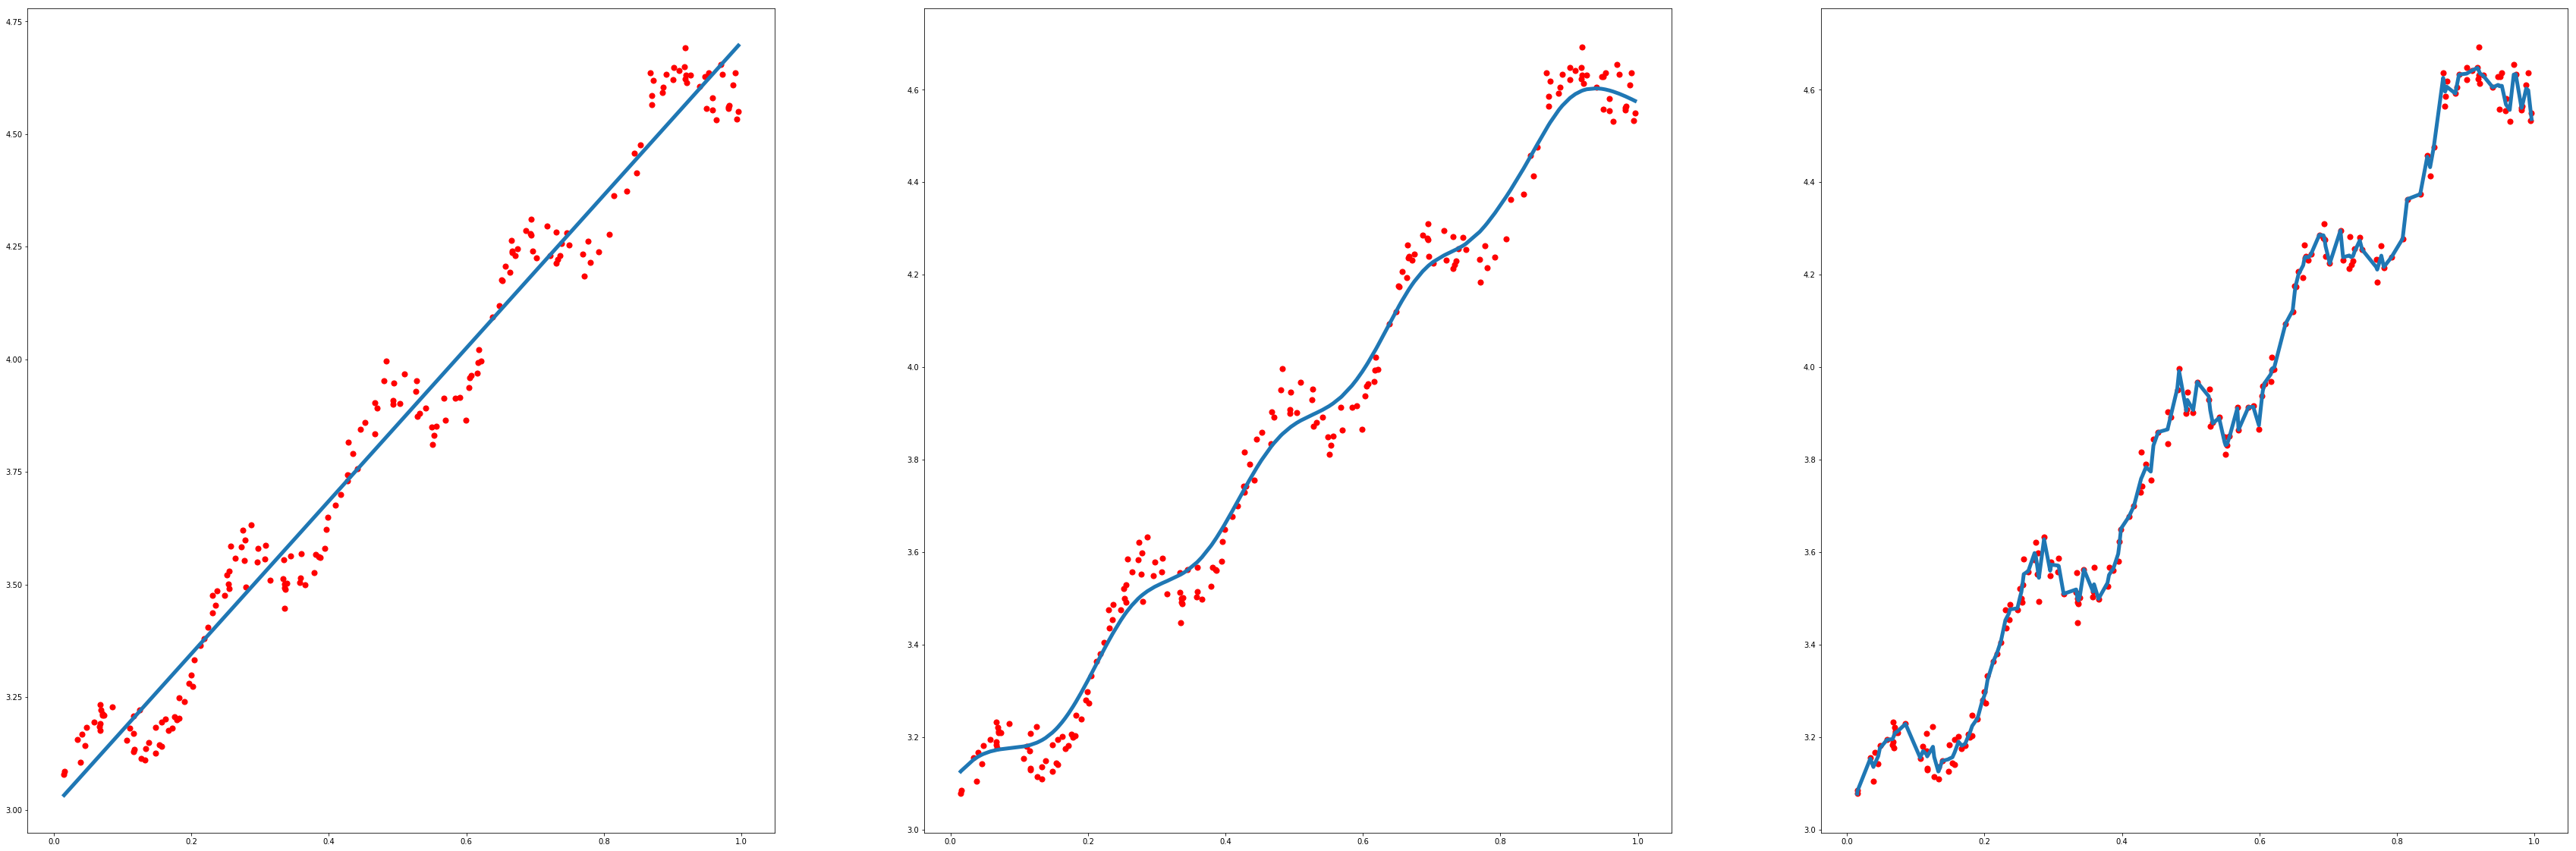

In [206]:
#不同k值对局部加权线性回归的影响
#k=1时，模型效果与最小二乘法差不多
plt.subplots(1,3,figsize=(60,20))#新建一个
plt.subplot(1,3,1)
lwlr_yPred = lwlrTest(xArr,xArr,yArr,k=1)
xMat = mat(xArr);yMat = mat(yArr).T
index = xMat[:,1].argsort(0)#对x轴的值进行排序
xSort = xMat[index,1]
ySort = lwlr_yPred[index]
plt.scatter(array(xArr)[:,1],array(yArr),s=50,c='red')#真实值
plt.plot(xSort,ySort,linewidth=5)#预测值

#k=0.05时，模型可以挖出数据的潜在规律
plt.subplot(1,3,2)
lwlr_yPred = lwlrTest(xArr,xArr,yArr,k=0.05)
xMat = mat(xArr);yMat = mat(yArr).T
index = xMat[:,1].argsort(0)
xSort = xMat[index,1]
ySort = lwlr_yPred[index]
plt.scatter(array(xArr)[:,1],array(yArr),s=50,c='red')
plt.plot(xSort,ySort,linewidth=5)

#k=0.01时，考虑了太多噪声，进而导致了过拟合现象
plt.subplot(1,3,3)
lwlr_yPred = lwlrTest(xArr,xArr,yArr,k=0.003)
xMat = mat(xArr);yMat = mat(yArr).T
index = xMat[:,1].argsort(0)
xSort = xMat[index,1]
ySort = lwlr_yPred[index]
plt.scatter(array(xArr)[:,1],array(yArr),s=50,c='red')
plt.plot(xSort,ySort,linewidth=5)

### 梯度下降法求解局部加权线性回归

In [210]:
#首先分配各数据点的权重
from numpy import *
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights2 = mat(zeros([m,1]))
    for i in range(m):
        diffMat = testPoint - xMat[i,:]
        weights2[i,0] = exp(diffMat*diffMat.T/(-2*k**2))#给每个点赋予权重，离测试点越近的点权重越大
    return weights2

In [211]:
#得到各数据的分配权重后，特征属性值和标签值都要相应的乘以权重
#离测试点越远其权重接近于0，相当于求解线性回归模型时删除了该点，只考虑测试点附近的点
weights2 = lwlr(xArr[0],xArr,yArr,0.05)
x_data = multiply(xMat,weights2)
y_data = multiply(yMat,weights2)

In [212]:
#利用更新后的数据利用梯度下降法求解权重系数
def gradient_Descent(xArr,yArr):
    dataMat = np.mat(xArr);labelMat = np.mat(yArr)
    n = dataMat.shape[1]
    w = np.mat(np.ones([n,1]))
    for i in range(2000):
        error = dataMat * w - labelMat
        w = w - 0.001*dataMat.T*error
    return w
w2 = gradient_Descent(x_data,y_data)

matrix([[3.17448002]])

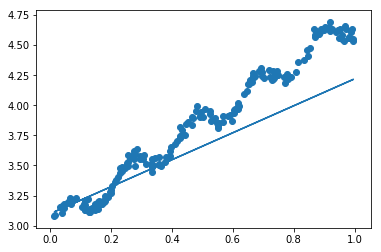

In [213]:
xMat = np.mat(dataList)
yPred2 = xMat * w2 #预测值
plt.scatter(dataArr[:,1],labelArr)#真实值
plt.plot(xMat[:,1],yPred2)
yPred2[0]

### 预测鲍鱼的年龄

In [172]:
#定义误差函数
def variance_error(yArr,yPred):
    return((yArr-yPred)**2).sum()

In [184]:
abx,aby = loadData('abalone.txt')
#在训练集上应用模型预测并测试误差
#k=0.1时
lwlr_pred1 = lwlrTest(abx[0:99],abx[0:99],aby[0:99],k=0.1)
display(variance_error(aby[0:99],lwlr_pred1))
#k=1时
lwlr_pred2 = lwlrTest(abx[0:99],abx[0:99],aby[0:99],k=1)
display(variance_error(aby[0:99],lwlr_pred2))
#k=10时
lwlr_pred3 = lwlrTest(abx[0:99],abx[0:99],aby[0:99],k=10)
display(variance_error(aby[0:99],lwlr_pred3.T))
#在测试集上应用模型预测并测试误差
#k=0.1时
lwlr_pred4 = lwlrTest(abx[100:199],abx[0:99],aby[0:99],k=0.1)
display(variance_error(aby[100:199],lwlr_pred4.T))
#k=1时
lwlr_pred5 = lwlrTest(abx[100:199],abx[0:99],aby[0:99],k=1)
display(variance_error(aby[100:199],lwlr_pred5.T))
#k=10时
lwlr_pred6 = lwlrTest(abx[100:199],abx[0:99],aby[0:99],k=10)
display(variance_error(aby[100:199],lwlr_pred6.T))

56.811168577945885

429.8905618702014

549.118170882589

60571.25199167674

573.5261441896967

517.5711905380425